In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress
import requests
import json
from pprint import pprint

from api_keys import weather_api_key

from citipy import citipy

In [2]:
# Define empty lists to hold city names and lat-lng pairs
cities = []
lat_lngs = []

# Define latitude and longitude ranges
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate random latitudes and longitudes
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

# Get nearest city for each lat-lng pair and add to cities list
for lat, lng in zip(lats, lngs):
    city = citipy.nearest_city(lat, lng).city_name
    if city not in cities:
        cities.append(city)
        lat_lngs.append((lat, lng))


In [3]:
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


In [4]:
url = 'https://api.openweathermap.org/data/2.5/weather?'

city_data=[]

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, (city, (lat, lng)) in enumerate(zip(cities, lat_lngs)):

    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0:
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = f"{url}lat={lat}&lon={lng}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country =city_weather['name']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 2 | port-aux-francais
Processing Record 2 of Set 2 | waitangi
Processing Record 3 of Set 2 | kerikeri
Processing Record 4 of Set 2 | yellowknife
Processing Record 5 of Set 2 | tsiombe
Processing Record 6 of Set 2 | strezhevoy
Processing Record 7 of Set 2 | puerto baquerizo moreno
Processing Record 8 of Set 2 | akureyri
Processing Record 9 of Set 2 | adamstown
Processing Record 10 of Set 2 | kodiak
Processing Record 11 of Set 2 | albany
Processing Record 12 of Set 2 | kangding
Processing Record 13 of Set 2 | broome
Processing Record 14 of Set 2 | tamanrasset
Processing Record 15 of Set 2 | zhob
Processing Record 16 of Set 2 | bilibino
Processing Record 17 of Set 2 | arno
Processing Record 18 of Set 2 | qaqortoq
Processing Record 19 of Set 2 | sandakan
Processing Record 20 of Set 2 | taiohae
Processing Record 21 of Set 2 | labuan lombok
Processing Record 22 of Set 2 | edinburgh of the seven seas
Processing 

Processing Record 46 of Set 5 | nova xavantina
Processing Record 47 of Set 5 | kapuskasing
Processing Record 48 of Set 5 | huittinen
Processing Record 49 of Set 5 | margate
Processing Record 50 of Set 5 | paradip garh
Processing Record 1 of Set 6 | sao vicente
Processing Record 2 of Set 6 | ghat
Processing Record 3 of Set 6 | isle of lewis
Processing Record 4 of Set 6 | manta
Processing Record 5 of Set 6 | magadan
Processing Record 6 of Set 6 | idri
Processing Record 7 of Set 6 | sisimiut
Processing Record 8 of Set 6 | illizi
Processing Record 9 of Set 6 | sao martinho
Processing Record 10 of Set 6 | constantia
Processing Record 11 of Set 6 | afaahiti
Processing Record 12 of Set 6 | sayat
Processing Record 13 of Set 6 | namtsy
Processing Record 14 of Set 6 | vozhega
Processing Record 15 of Set 6 | amherst
Processing Record 16 of Set 6 | cargados carajos
Processing Record 17 of Set 6 | okhotsk
Processing Record 18 of Set 6 | kodinsk
Processing Record 19 of Set 6 | tchintabaraden
Process

Processing Record 45 of Set 9 | malpica
Processing Record 46 of Set 9 | balikpapan
Processing Record 47 of Set 9 | tura
Processing Record 48 of Set 9 | nantucket
Processing Record 49 of Set 9 | cockburn town
Processing Record 50 of Set 9 | east london
Processing Record 1 of Set 10 | ixtapa
Processing Record 2 of Set 10 | hilo
Processing Record 3 of Set 10 | wamba
Processing Record 4 of Set 10 | klyuchi
Processing Record 5 of Set 10 | qinzhou
Processing Record 6 of Set 10 | puerto el triunfo
Processing Record 7 of Set 10 | kamennomostskiy
Processing Record 8 of Set 10 | tsetserleg
Processing Record 9 of Set 10 | kone
Processing Record 10 of Set 10 | novodvinsk
Processing Record 11 of Set 10 | conceicao da barra
Processing Record 12 of Set 10 | noyabrsk
Processing Record 13 of Set 10 | santa ana de yacuma
Processing Record 14 of Set 10 | taoudenni
Processing Record 15 of Set 10 | luau
Processing Record 16 of Set 10 | kirakira
Processing Record 17 of Set 10 | ad darbasiyah
Processing Reco

Processing Record 39 of Set 13 | kushiro
Processing Record 40 of Set 13 | chernyshevskiy
Processing Record 41 of Set 13 | tulnici
Processing Record 42 of Set 13 | hammerfest
Processing Record 43 of Set 13 | gemena
Processing Record 44 of Set 13 | santana
Processing Record 45 of Set 13 | severo-yeniseyskiy
Processing Record 46 of Set 13 | pedro juan caballero
Processing Record 47 of Set 13 | minas de marcona
Processing Record 48 of Set 13 | safotu
Processing Record 49 of Set 13 | mhamid
Processing Record 50 of Set 13 | lamar
Processing Record 1 of Set 14 | dahab
Processing Record 2 of Set 14 | karatuzskoye
Processing Record 3 of Set 14 | ghormach
Processing Record 4 of Set 14 | brockville
Processing Record 5 of Set 14 | fada
Processing Record 6 of Set 14 | arsk
Processing Record 7 of Set 14 | piriapolis
Processing Record 8 of Set 14 | kargasok
Processing Record 9 of Set 14 | winnemucca
Processing Record 10 of Set 14 | dolbeau-mistassini
Processing Record 11 of Set 14 | valparaiso
Proces

In [5]:
city_data_df=pd.DataFrame(city_data)

In [6]:
city_data_df.count()

City          623
Lat           623
Lng           623
Max Temp      623
Humidity      623
Cloudiness    623
Wind Speed    623
Country       623
Date          623
dtype: int64

In [7]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-76.8905,70.5633,222.07,84,18,11.61,,1683826037
1,waitangi,-47.1651,-171.3881,283.73,63,66,11.87,,1683826037
2,kerikeri,-36.3815,168.6961,289.03,62,100,8.30,,1683826037
3,yellowknife,81.1034,-104.5248,267.11,91,100,4.71,,1683826037
4,tsiombe,-36.1222,47.8560,291.61,80,89,7.32,,1683826037


In [8]:
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [9]:
lat_x_axis=city_data_df['Lat']
temp_y_axis=city_data_df['Max Temp']

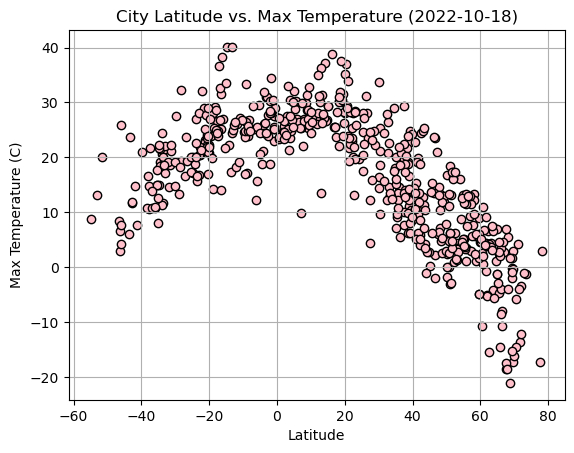

In [10]:
plt.scatter(lat_x_axis, temp_y_axis,facecolor='pink', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (2022-10-18)')
plt.grid()

plt.savefig("output_data1/Fig1.png")

plt.show()

In [11]:
lat_x_axis=city_data_df['Lat']
hum_y_axis=city_data_df['Humidity']

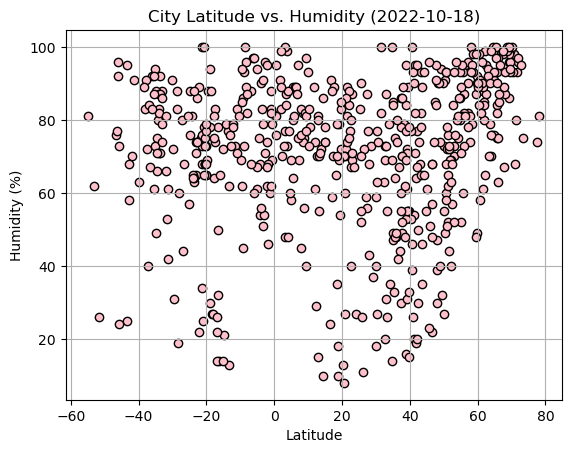

In [12]:
plt.scatter(lat_x_axis, hum_y_axis,facecolor='pink', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid()

plt.savefig("output_data1/Fig2.png")

plt.show()

In [13]:
lat_x_axis=city_data_df['Lat']
cloud_y_axis=city_data_df['Cloudiness']

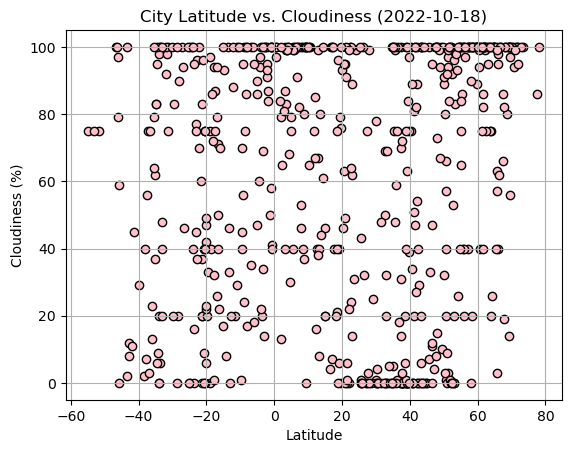

In [14]:
plt.scatter(lat_x_axis, cloud_y_axis,facecolor='pink', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid()

plt.savefig("output_data1/Fig3.png")

plt.show()

In [15]:
lat_x_axis=city_data_df['Lat']
wind_y_axis=city_data_df['Wind Speed']

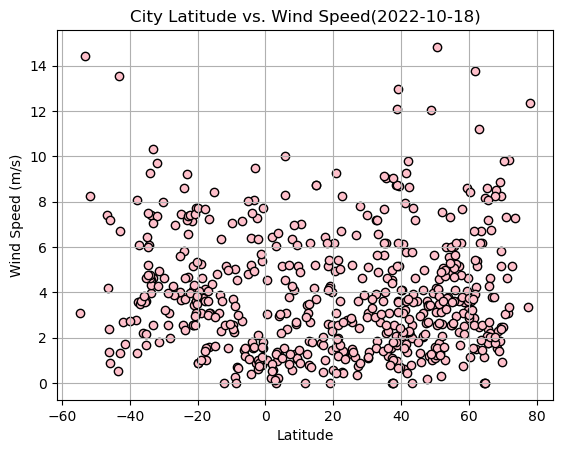

In [16]:
plt.scatter(lat_x_axis, wind_y_axis,facecolor='pink', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed(2022-10-18)')
plt.grid()

plt.savefig("output_data1/Fig4.png")

plt.show()

In [17]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [18]:
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [19]:
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


In [45]:
# Define x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-value is: 0.7161472181434118


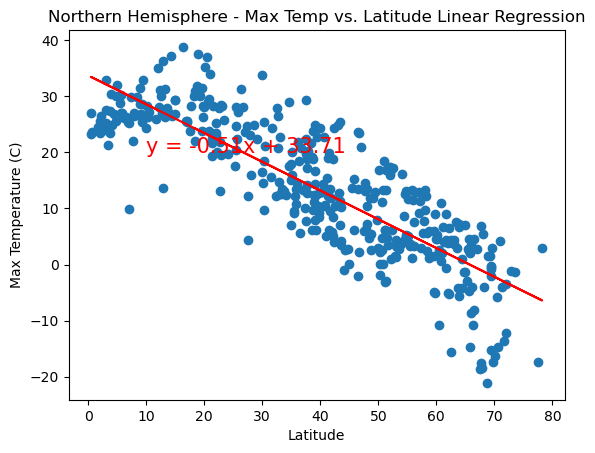

In [46]:
# Create scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(10,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


In [47]:
# Define x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-value is: 0.4121057168607245


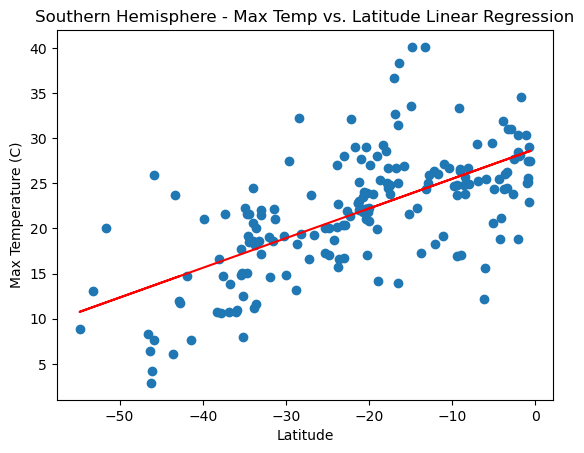

In [48]:
# Create scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(10,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


In [24]:
# Define x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-value is: 0.05689741545789598


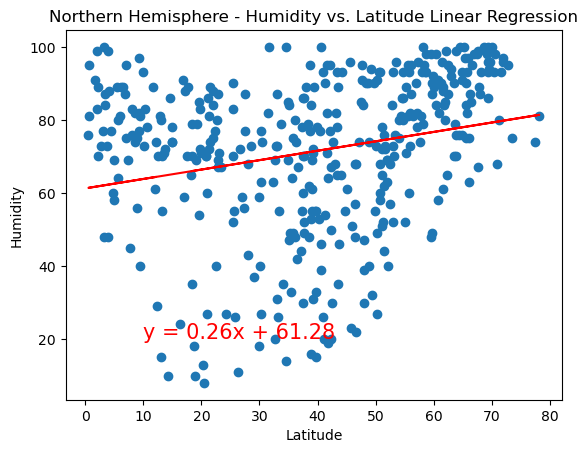

In [26]:
# Create scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(10,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [49]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-value is: 0.0002808747046324607


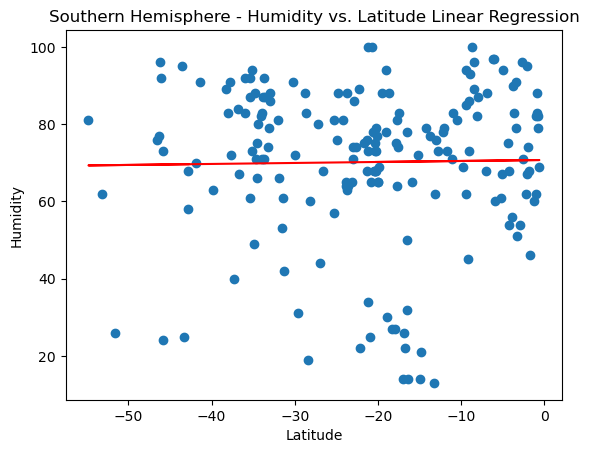

In [50]:
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(10,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [28]:
# Define x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-value is: 0.024026517125811015


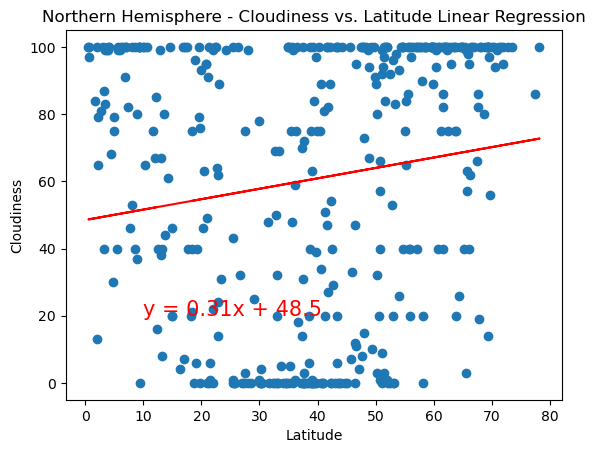

In [29]:
# Create scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(10,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [51]:
# Define x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-value is: 0.02056735429994368


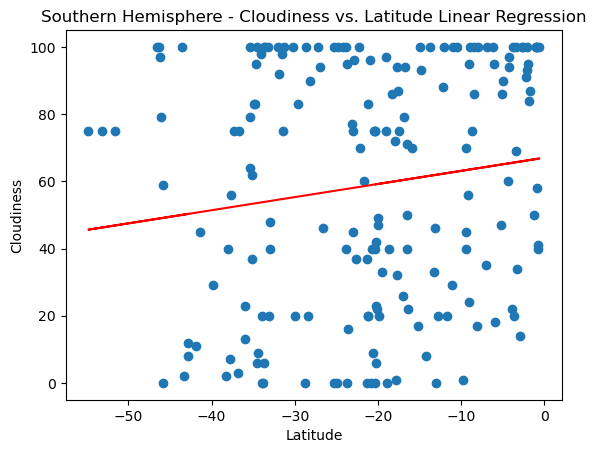

In [52]:
# Create scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(10,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [53]:
# Define x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-value is: 0.030396762354449467


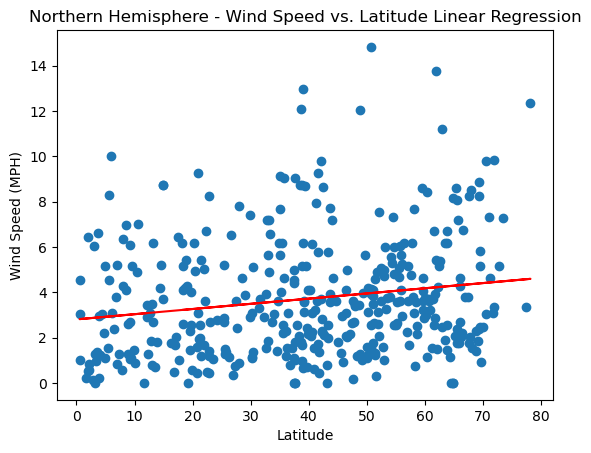

In [54]:
# Create scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(10,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [55]:
# Define x and y values
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-value is: 0.062239040700515696


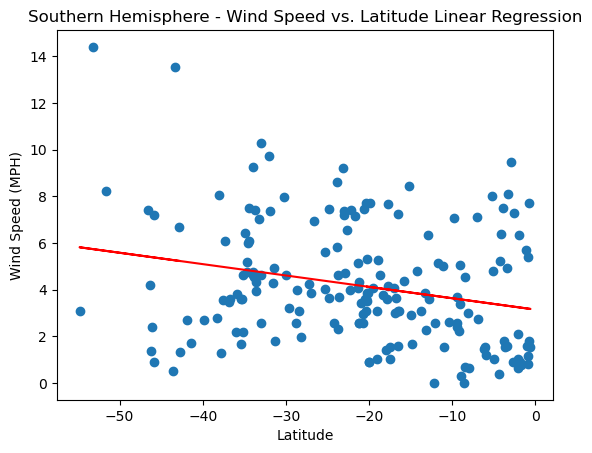

In [56]:
# Create scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")

# Annotate the line equation
plt.annotate(line_eq,(10,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

Max Temp by Hemisphere: The graph shows us as we apporach the equator that temperatrue will increase. That shows in both the northern and southern hemisphere.

Humidity: In the northern hemisphere it would appear that as we leave the eqautor that the humidity increase every so slighlty. In the southern hemisohere the regression line is almost flat all the way to the equator. It would appear that any humidty can appear at any lattitide.

Cloudiness: Cloudiness seems to increase from south to north. It appears that the is a lot of cloudiness at the eqautor and seems to thin out as we move from the equator in both directions.

Wind Speed: Wind speed seems to decrease as we appraoch the equator from the north and the south. With the peaks as far away from the equator as possible. There are a few 